# 1. Create a new dataframe by filtering all the columns [i.e., features] except N_total, N_bulk, N_surface and R_avg columns.

First 20 samples:
    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104

Statistics for each feature:
                  Mean      Std Dev           Q1  Median (Q2)           Q3
N_total    3476.786500  3679.286769  

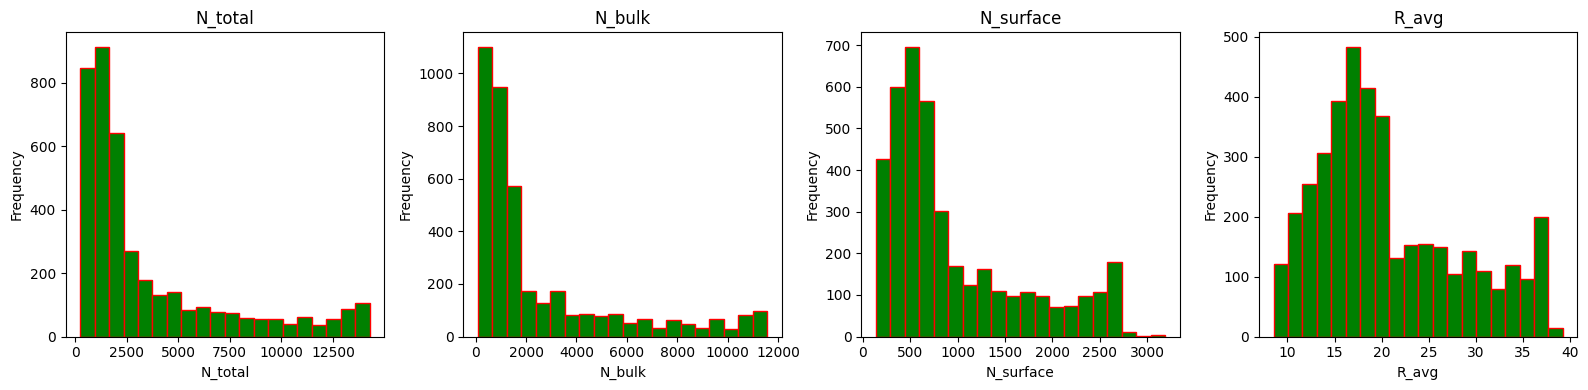

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change the path below to match your file location in Drive
file_path = "/content/drive/My Drive/Colab Notebooks/Au_nanoparticle_dataset.csv"
df = pd.read_csv(file_path)

# 1. Create new dataframe with only required features
features = ["N_total", "N_bulk", "N_surface", "R_avg"]
new_df = df[features]

# 2. Display first 20 samples
print("First 20 samples:")
print(new_df.head(20))

# 3. Calculate mean, standard deviation, and quartiles
stats = pd.DataFrame({
    "Mean": new_df.mean(),
    "Std Dev": new_df.std(),
    "Q1": new_df.quantile(0.25),
    "Median (Q2)": new_df.quantile(0.50),
    "Q3": new_df.quantile(0.75)
})
print("\nStatistics for each feature:")
print(stats)
print("\n")

# 4. Plot histograms in a 1x4 layout
plt.figure(figsize=(16, 4))
for i, col in enumerate(features):
    plt.subplot(1, 4, i+1)
    plt.hist(new_df[col], bins=20, color="green", edgecolor="red")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
print("\n")

# 5. Visualize scatter plots & histograms using PairGrid
g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)  # bivariate histogram
g.map_diag(sns.histplot, kde=True, color="orange")  # histogram & kernal density estimation on diagonal
g.map_lower(sns.kdeplot, fill=True, cmap="Blues")  # bivariate kernal density estimation
plt.show()
